# Analyse des écoles et collèges Français suite aux diverses polémiques sur le secteur privé et publique.

source des fichiers : data-gouv ministère de l'éducation nationale

Objectifs : déterminer si l'éducation nationale permet de changer de status social.

Pour cela, on va regarder le parcours des élèves de la maternelle aux lycées.

In [1]:
# import des bibliotheques
# import bibliothéques d'analyse de python
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

import fonctions.perso_stats as perso_stats


In [2]:
# import des fichiers
ecole = pd.read_csv('donnee_temp/ecole.csv',low_memory=False)
                                                    
college = pd.read_csv('donnee_temp/college.csv',low_memory=False)

lycee = pd.read_csv('donnee_temp/lycee.csv',low_memory=False)

# prepa donne : les données ayant pas de resultats autre que 2022 + college sans donnée
college2022 = college[college['Rentrée scolaire']==2022].copy()



In [3]:
# style graphe :
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

# École maternelle et élémentaire :
<br>
On regarde la situation générale, et si on peut voir une discrimination des élèves en foncion de leur statut social.

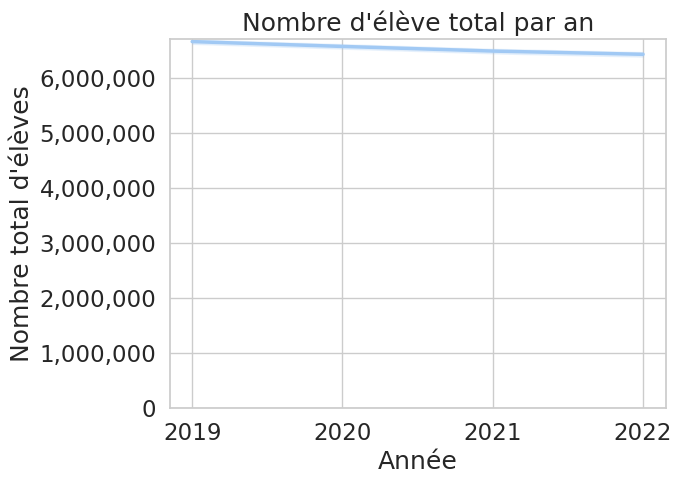

In [4]:
fig,ax = plt.subplots()
sns.lineplot(data=ecole,x='Rentrée scolaire',y="Nombre total d'élèves",ax=ax,estimator='sum')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("Nombre d'élève total par an")
ax.set_xlabel("Année")
ax.set_ylabel("Nombre total d'élèves")
plt.show()

Le nombre d'élève est en légère baisse.

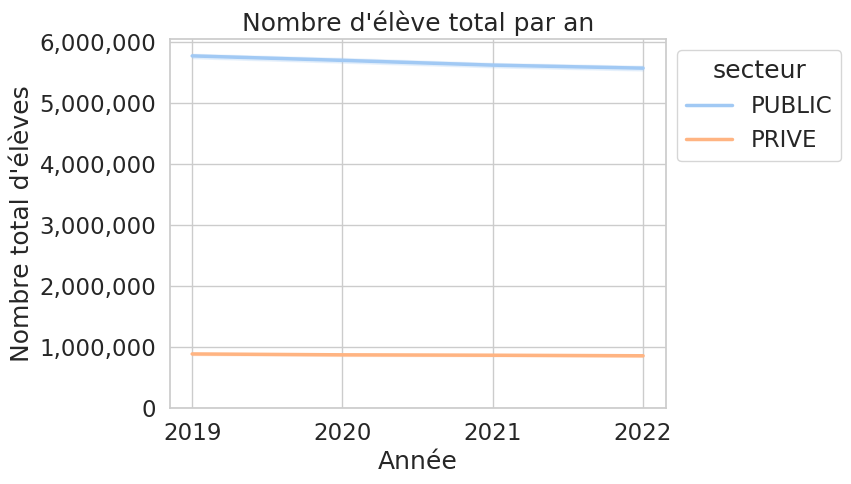

In [5]:
fig,ax = plt.subplots()
sns.lineplot(data=ecole,x='Rentrée scolaire',y="Nombre total d'élèves",hue="secteur",ax=ax,estimator='sum')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("Nombre d'élève total par an")
ax.set_xlabel("Année")
ax.set_ylabel("Nombre total d'élèves")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

La baisse est plus forte en public qu'en privé.

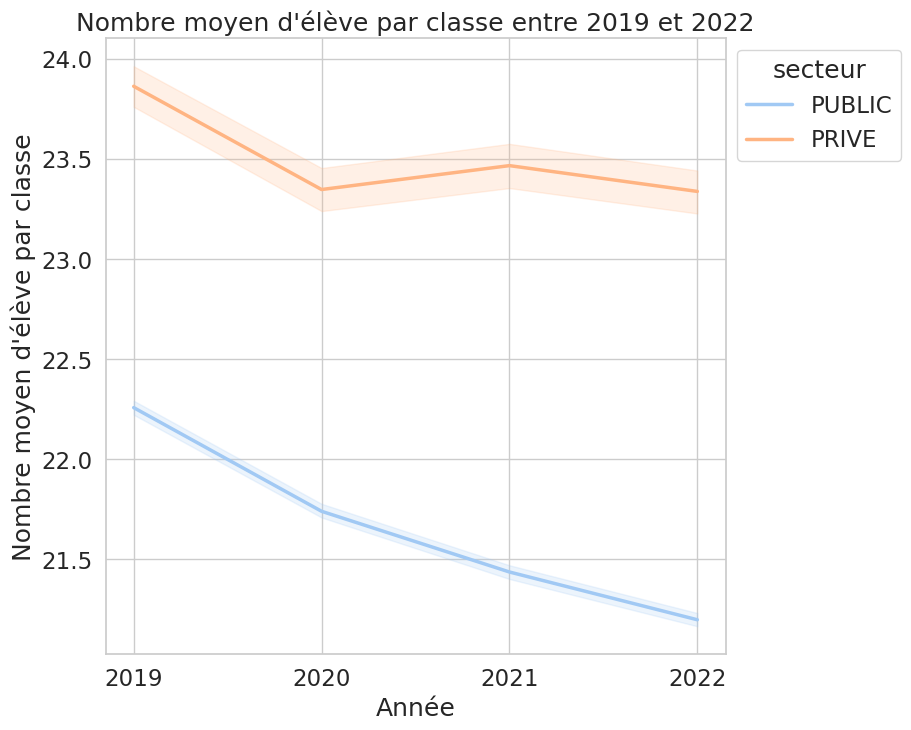

In [6]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=ecole,x='Rentrée scolaire',y="Nombre moyen d'élève par classe",hue="secteur",ax=ax,estimator='mean')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Nombre moyen d'élève par classe entre 2019 et 2022")
ax.set_xlabel("Année")
ax.set_ylabel("Nombre moyen d'élève par classe")
ax.set_ylim()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Le nombre d'élève par classe baisse globalement.<br>
L'école publique à moins d'élève par classe que les écoles privée.<br>
Donc le professeur en public à plus de temps à consacrer à chaques élèves que les professeurs privée.<br>

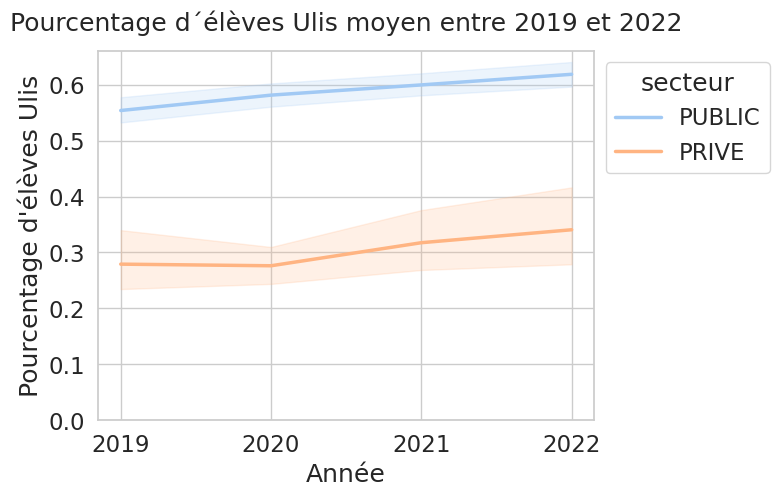

In [7]:
fig,ax = plt.subplots()
sns.lineplot(data=ecole,x='Rentrée scolaire',y='Pourcentage ULIS',hue='secteur',ax=ax,estimator='mean')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Pourcentage d´élèves Ulis moyen entre 2019 et 2022",pad=15)
ax.set_xlabel("Année")
ax.set_ylabel("Pourcentage d'élèves Ulis")
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

On a environ 2 fois moins d´élèves ULIS dans les classes des écoles privées.

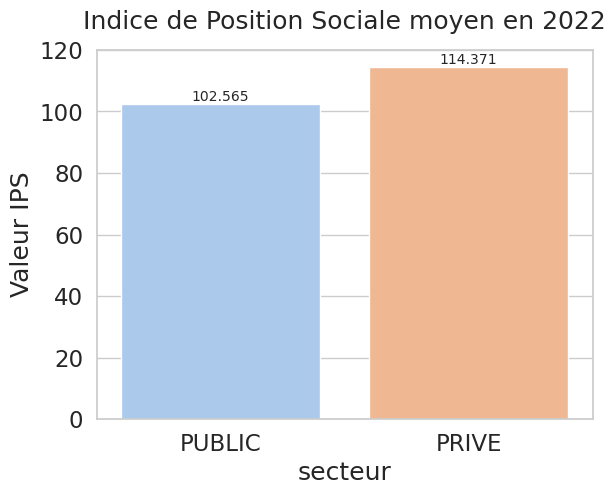

In [8]:
fig,ax = plt.subplots()
sns.barplot(data=ecole,x='secteur', y="IPS",ax=ax,estimator="mean",errorbar=None)
ax.set_title("Indice de Position Sociale moyen en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

Les conditions sociales des élèves du privé sont plus favorables à la réussite que dans le public<br>


### Conclusion école :
<br>
Les écoles privées ont en moyenne plus d'élèves dans leurs classes que les établissements publics.<br>
Certaines personnes y voient un raisonnement économique : plus d'élèves par classes plus de profit.<br>
D'autres personnes y voient une autre raison : plus il y a d'élèves en classe, plus il y a d'émulsion.<br>
Certains témoignages parlent plus de réseautage. Ces établissements seraient plus là pour acquérir des relations que pour acquérir des savoirs.<br>
<br>
Les écoles publiques ont en moyenne plus d'élèves du type ULIS que les ceux du privé. De plus les élèves du privée sont issus d'un milieu plus favorable.<br>
N'ayant pas de plus amples détails sur l'IPS dans les écoles primaires et maternelles, je ne peut pas confirmer ou non les discours politiques qui disent qu'il y a une sectorisation des élèves. Les pauvres restant dans le public, les riches dans le privé.

# Collège

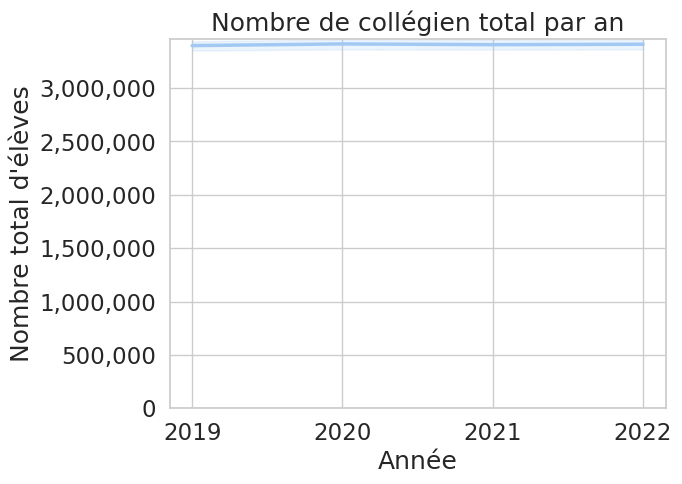

In [9]:
fig,ax = plt.subplots()
sns.lineplot(data=college,x='Rentrée scolaire',y="Nombre d'élèves total",ax=ax,estimator='sum')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("Nombre de collégien total par an")
ax.set_xlabel("Année")
ax.set_ylabel("Nombre total d'élèves")
plt.show()

Le nombre de collégien reste stable.

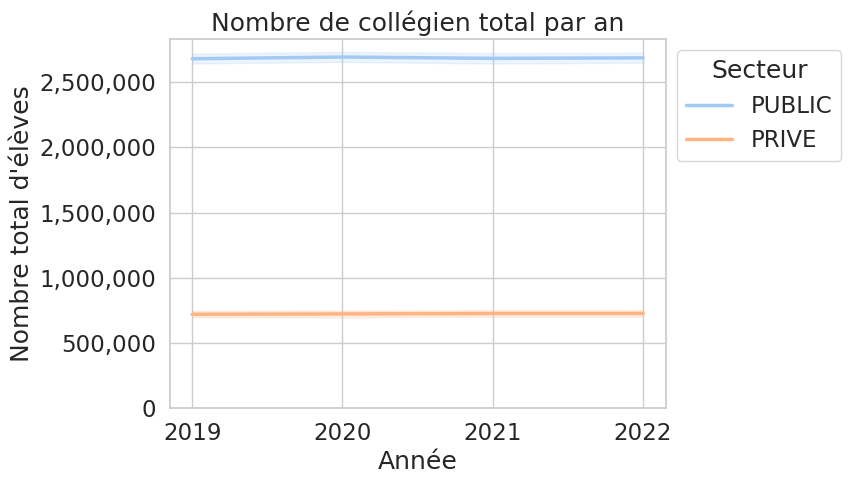

In [10]:
fig,ax = plt.subplots()
sns.lineplot(data=college,x='Rentrée scolaire',y="Nombre d'élèves total",ax=ax,estimator='sum',hue='Secteur')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("Nombre de collégien total par an")
ax.set_xlabel("Année")
ax.set_ylabel("Nombre total d'élèves")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Le nombre d'élève dans le privé reste très stable.<br>
Le nombre d'élève dans le public subit un peu plus de fluctuation, mais très légére.<br>

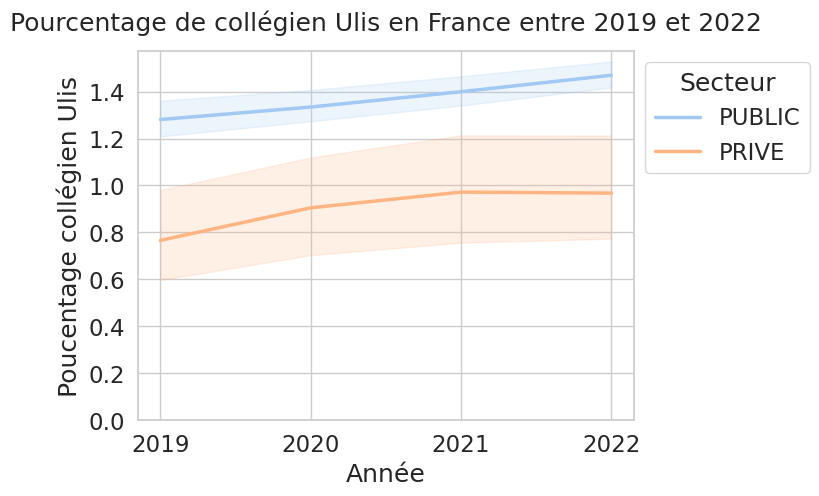

In [11]:
fig,ax = plt.subplots()
sns.lineplot(data=college,x='Rentrée scolaire',y="Pourcentage Ulis sur le nombre d'eleves total",hue='Secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Pourcentage de collégien Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("Année")
ax.set_ylabel("Poucentage collégien Ulis")
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Le pourcentage d'élèves ULIS dans les classes est supérieur dans le public.<br>
Il y a une augmentation constante des élèves ULIS dans le public. <br>
L'augmentation en pourcentage était très forte en 2019 pour finalement se stabiliser en 2021 sur le privé.<br>

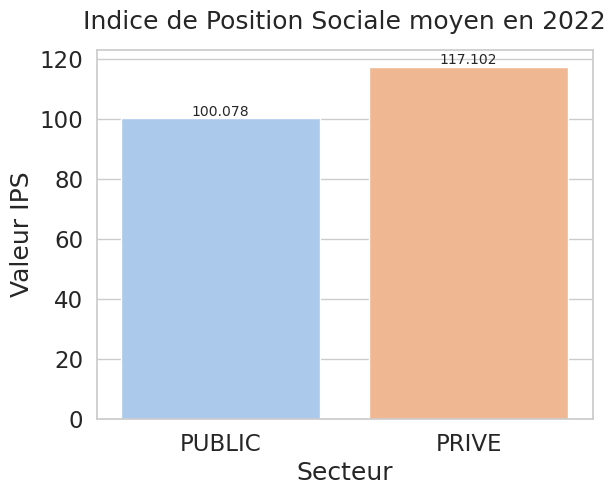

In [12]:
fig,ax = plt.subplots()
sns.barplot(data=college, y="IPS",ax=ax,estimator="mean",x='Secteur',errorbar=None)
ax.set_title("Indice de Position Sociale moyen en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

L'écart moyen de l'indice de Position Sociale dans les collèges est plus important que dans les écoles primaires et maternelle.

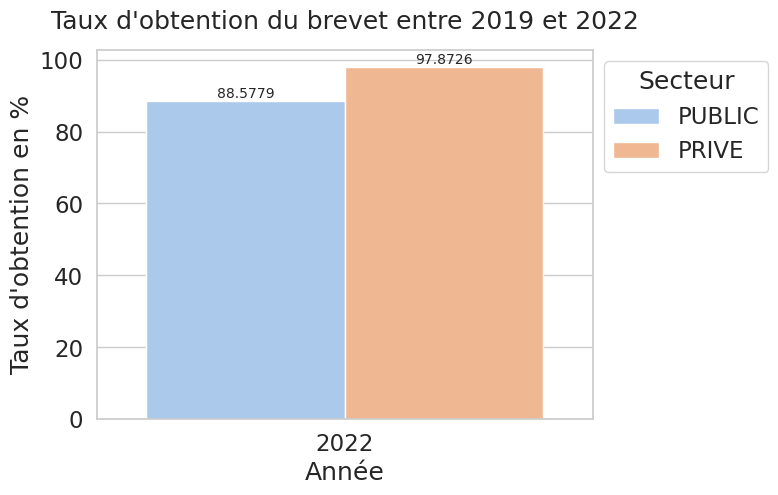

In [13]:
fig,ax = plt.subplots()
sns.barplot(data=college2022, x="Rentrée scolaire", y="Taux de réussite - G",ax=ax,hue="Secteur",estimator="mean",errorbar=None)
ax.set_title("Taux d'obtention du brevet entre 2019 et 2022",pad=15)
ax.set_ylabel("Taux d'obtention en %")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Un écart de 10 points entre les résultats des collèges privés et publics.

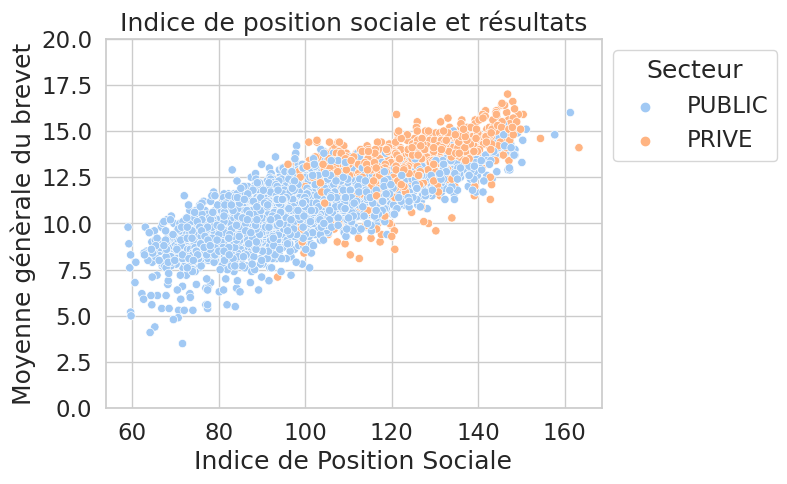

In [14]:
fig,ax = plt.subplots()
sns.scatterplot(data=college2022,y="Note à l'écrit - G",x='IPS',hue='Secteur',ax=ax)
ax.set_title('Indice de position sociale et résultats')
ax.set_ylabel('Moyenne génèrale du brevet')
ax.set_xlabel('Indice de Position Sociale')
ax.set_ylim(0,20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [15]:
# verifier corrélation entre note et ips
corrélation_note_ips = round(college['IPS'].corr(college["Note à l'écrit - G"])*100,2)
print("On a une corrélation de ",corrélation_note_ips,"%.")

On a une corrélation de  79.55 %.


On remarque bien la corrélation entre l'IPS et les notes aux brevets.<br>
L'IPS explique à 80% les notes à l'écrit au brevets.<br>

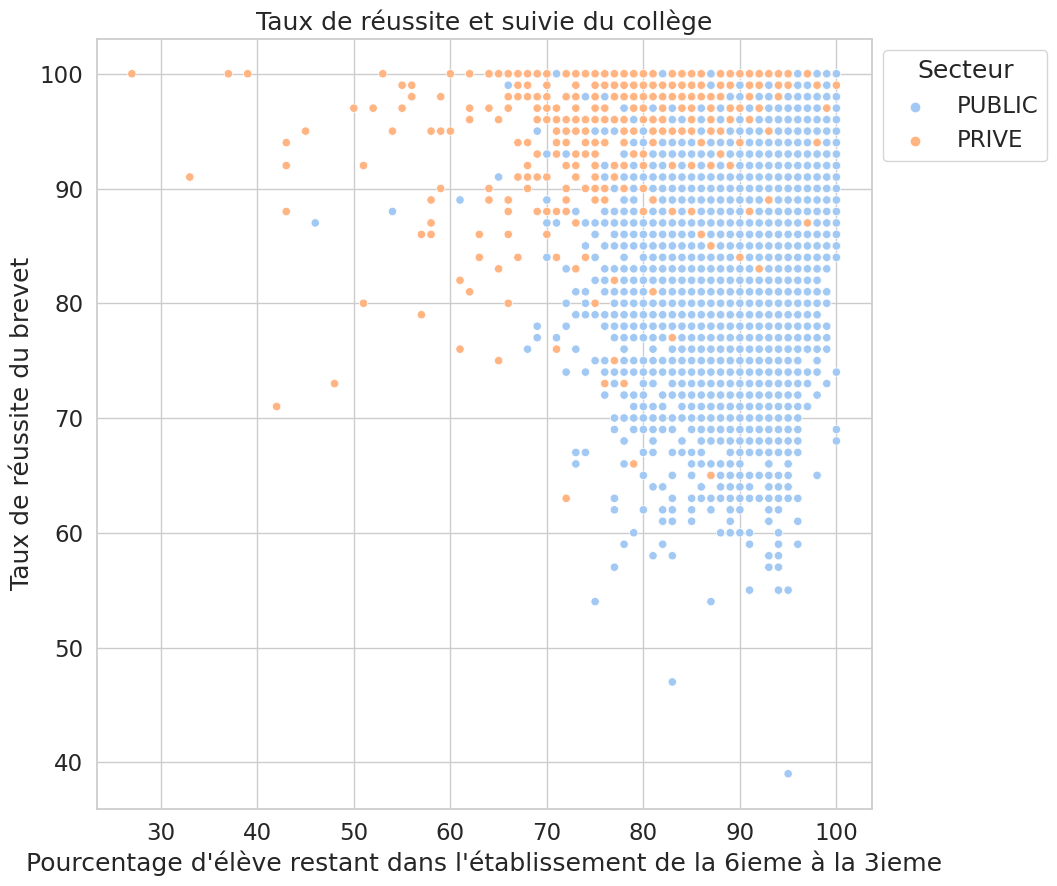

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(data=college,x="Taux d'accès 6ème-3ème" ,y='Taux de réussite - G',hue='Secteur',ax=ax)
ax.set_title('Taux de réussite et suivie du collège')
ax.set_ylabel('Taux de réussite du brevet')
ax.set_xlabel("Pourcentage d'élève restant dans l'établissement de la 6ieme à la 3ieme")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Les taux de réussite au brevet sont plus hauts dans le privé mais les taux de maintien des élèves dans les établissements publics sont plus haut.<br>

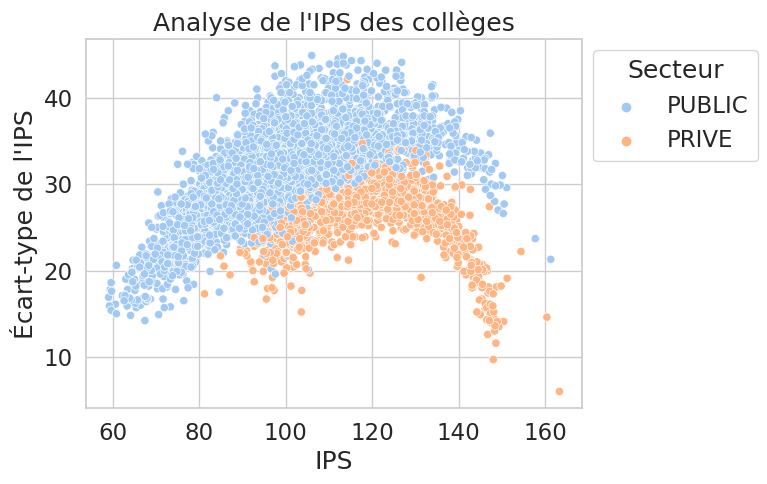

In [17]:
fig,ax = plt.subplots()
sns.scatterplot(data=college,x='IPS',y="Ecart-type de l'IPS",hue='Secteur',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Écart-type de l'IPS")
ax.set_title("Analyse de l'IPS des collèges")
plt.show()

Comparaison des populations des collèges privés et publics au niveau de l'IPS :

In [18]:
pop_public = college[college['Secteur']=='PUBLIC']
pop_privé =  college[college['Secteur']=='PRIVE']
result = perso_stats.ANOVA(df1=pop_public['IPS'].dropna(),df2=pop_privé['IPS'].dropna())

del pop_privé,pop_public



Interprétation du test:
H0 : Les moyennes des groupes sont égales
H1 : Les moyennes des groupes ne sont pas égales
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %


On s'aperçoit qu'au niveau de l'IPS, certains collèges privés ont une population plutôt privilégiée.<br>
Certains collèges ont donc un IPS très élèvé avec un faible écart type ce qui peut être aperçu comme un entre-soi<br>
Á l'autre extrémité certains collèges publics ont un public avec un faible IPS et une faible mixité sociale.<br>
Cela peut ressembler de loin à une sorte de ghettoïsation d'une certaine population.<br>

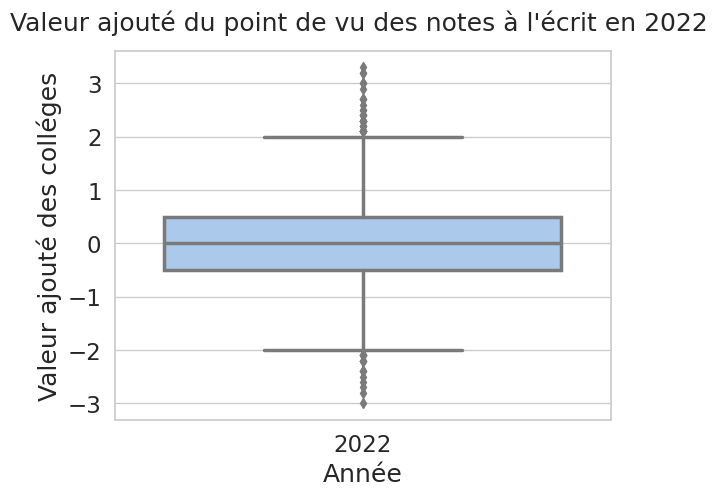

In [19]:
fig,ax = plt.subplots()
sns.boxplot(data=college2022, x="Rentrée scolaire", y="VA de la note - G",ax=ax)
ax.set_title("Valeur ajouté du point de vu des notes à l'écrit en 2022 ",pad=15)
ax.set_ylabel("Valeur ajouté des colléges")
ax.set_xlabel("Année")
plt.show()

Une moyenne à 0.

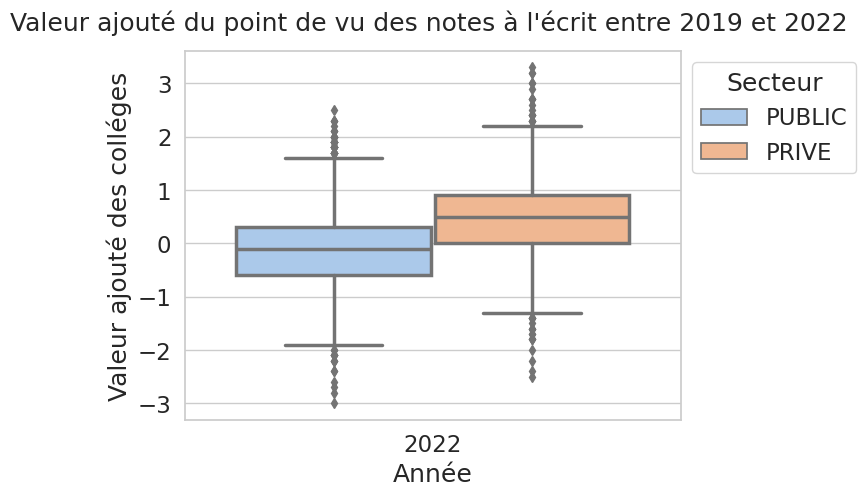

In [20]:
fig,ax = plt.subplots()
sns.boxplot(data=college2022, x="Rentrée scolaire", y="VA de la note - G",ax=ax,hue="Secteur")
ax.set_title("Valeur ajouté du point de vu des notes à l'écrit entre 2019 et 2022 ",pad=15)
ax.set_ylabel("Valeur ajouté des colléges")
ax.set_xlabel("Année")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

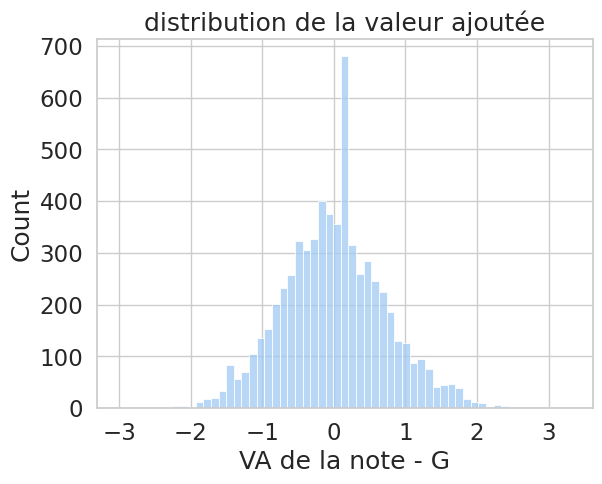

Test de shapiro pour voir si la distribution suis une normale


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est supérieure au niveau de signification alpha = 0.05 ,
on ne peut pas rejeter l'hypothèse nulle H0.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  5.0 %


In [21]:
# prepa donnée : les données ayant pas de resultats autre que 2022 + college sans donnée
college2022 = college[college['Rentrée scolaire']==2022].copy()

# distributon va de la note
fig,ax =plt.subplots()
sns.histplot(college2022,x='VA de la note - G',ax=ax)
ax.set_title('distribution de la valeur ajoutée')
plt.show()
del fig,ax
# test normalité valeur ajouté
print("Test de shapiro pour voir si la distribution suis une normale")
rep = perso_stats.test_loi_normale(college2022['VA de la note - G'])
del rep

Dans la notice :<br>
En moyenne, la réussite des élèves comparables en termes sociodémographiques et scolaires est très sensible à la composition sociodémographique des collèges où ils sont scolarisés (âge, origine sociale, niveau scolaire à l’entrée en sixième et sexe des élèves).<br>
<br>
Le calcul de la valeur ajoutée prend en compte ces critères selon la notice.<br>
Mais j'ai un doute car :
<ul>
<li>80 % de la note est corrélé par l'IPS.</li> 
<li>Les populations des établissement privés et publics ne sont pas les mêmes en termes sociaux</li>
<li>En moyenne les établissements privés resortent positivement (ils ajoutent de la valeur ajouté)</li>
</ul>
N'ayant pas accès aux calculs éxacts de cette valeur ajoutée, je doute de la validité et de l'impartialité de cet indicateur.<br>
De plus, le calcul est basé sur une prédiction, donc déjà la prédiction est elle éxacte? <br>
Cet indicateur va être souvent utilisé par les médias pour faire un classement des établissements. Les médias vont justes donner le classement sans analyser l'indicateur.<br>
La valeur ajoutée n'est pas distribuée normalement. Ce qui me met un doute supplémentaire sur la viabilité de leur prévision.<br>
Les analystes qui ont créés cet indicateur ont certainement fait un gros travail, mais je pense qu'il reste encore du taff à faire pour avoir un vrai indicateur de la "valeur ajoutée" des établissements.<br>
Une tentative de recréer la "valeur ajoutées des notes" est faite dans le notebook "test de prediction des notes du brevet.ipynb"<br>
<br>
Pour plus de renseignement sur la Valeur ajouté vous pouvez télécharger la dernière notice <a href =https://www.data.gouv.fr/fr/datasets/indicateurs-de-valeur-ajoutee-des-colleges/>ici</a>

Conclusion collège :<br>
Les écarts sociaux se creusent au niveau du collège.<br>
On remarque un commencement de création de "clan scolaire" par rapport aux origines sociales des individus.<br>
Les résultats aux brevets sont majoritairement dus à l'origine sociale des parents.<br>
Pour améliorer les résultats sur le long terme, il faudrait améliorer les conditions sociales des parents.<br>

# Lycée Work In Progress

Observons la situation dans les lycées de France.

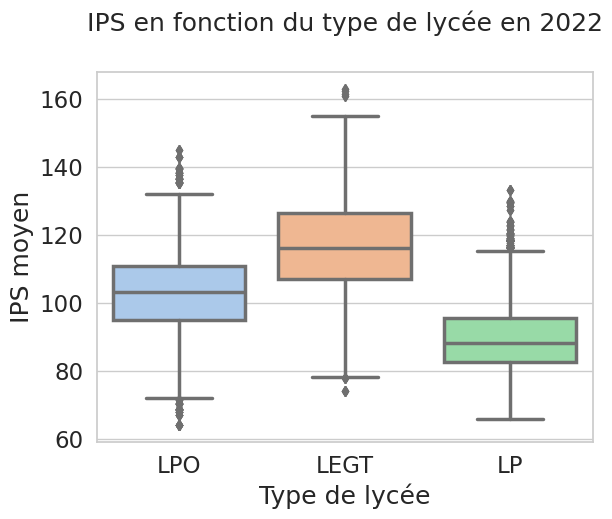

In [29]:
# type de lycee ips et rentree :
fig,ax = plt.subplots()
sns.boxplot(data=lycee[lycee['Rentrée scolaire']==2022],x='Type de lycée', y='IPS Ensemble GT-PRO',ax=ax)
ax.set_title('IPS en fonction du type de lycée en 2022',pad=30)
ax.set_ylabel("IPS moyen")
plt.show()

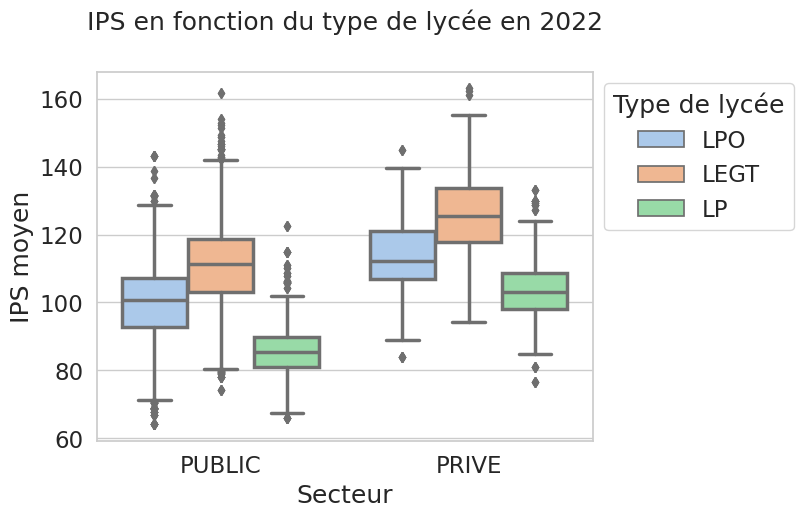

In [26]:
# type de lycee ips et rentree :
fig,ax = plt.subplots()
sns.boxplot(data=lycee[lycee['Rentrée scolaire']==2022],x='Secteur', y='IPS Ensemble GT-PRO',hue='Type de lycée',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('IPS en fonction du type de lycée en 2022',pad=30)
ax.set_ylabel("IPS moyen")
plt.show()


Sans surpise, le secteur public a une population avec un IPS plus bas que le privée.<br>
Les établissements enseignement général on un indice plus haut ques les établissements Professionnel et Technique.<br>

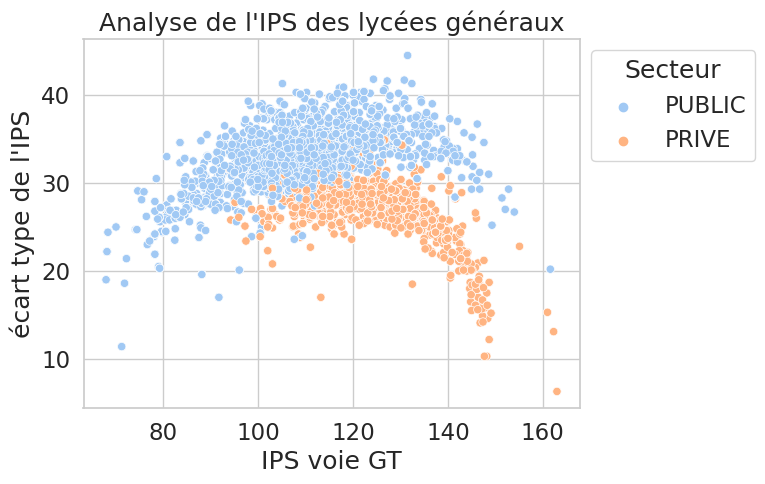

In [34]:
fig,ax = plt.subplots()
sns.scatterplot(data=lycee,x='IPS voie GT',y="Ecart-type de l'IPS voie GT",hue='Secteur',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("écart type de l'IPS")
ax.set_title("Analyse de l'IPS des lycées généraux")
plt.show()

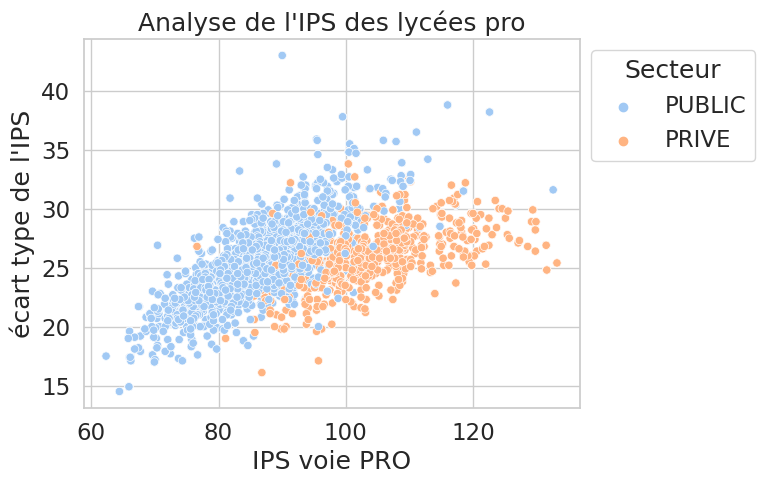

In [36]:
fig,ax = plt.subplots()
sns.scatterplot(data=lycee,x='IPS voie PRO',y="Ecart-type de l'IPS voie PRO",hue='Secteur',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("écart type de l'IPS")
ax.set_title("Analyse de l'IPS des lycées pro")
plt.show()

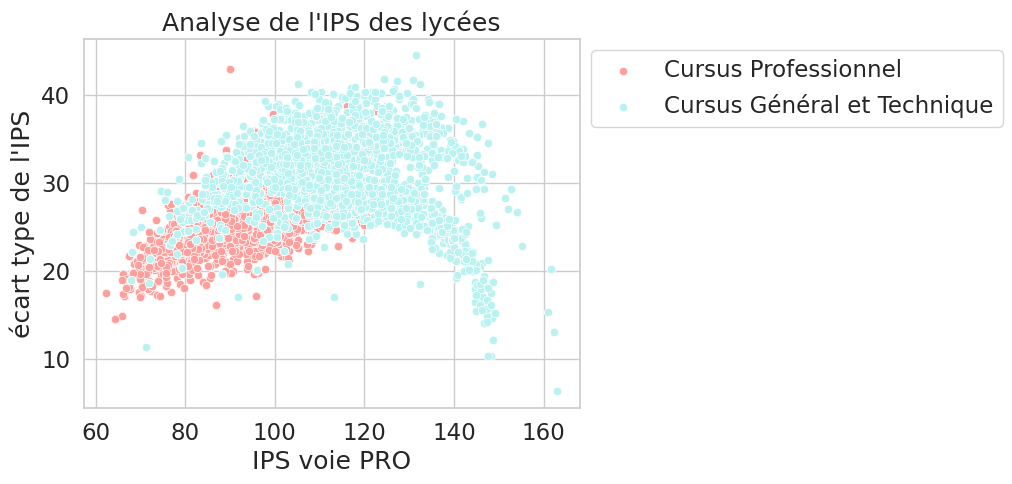

In [38]:
fig,ax = plt.subplots()
sns.scatterplot(data=lycee,x='IPS voie PRO',y="Ecart-type de l'IPS voie PRO",ax=ax,label='Cursus Professionnel',color=palette[3])
sns.scatterplot(data=lycee,x='IPS voie GT',y="Ecart-type de l'IPS voie GT",ax=ax,label='Cursus Général et Technique',color=palette[9])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("écart type de l'IPS")
ax.set_title("Analyse de l'IPS des lycées")
plt.show()